Task 7: Conceptual Questions (Markdown cell)
Ques.1> What is the difference between Bagging and Boosting?
Ans.> Bagging (Bootstrap Aggregating) trains multiple models independently on random subsets of data and then aggregates their results (like voting or averaging). It focuses on reducing variance.

Boosting trains models sequentially, where each new model tries to fix the errors of the previous one. It focuses on reducing bias.

Ques.2> How does Random Forest reduce variance?
Ans.> Random Forest builds many decision trees on different random subsets of data and features. By averaging their predictions, it smooths out individual tree “noisiness” and makes the overall model more stable and generalizable. That reduces variance without increasing bias too much.

Ques.3> What is the weakness of boosting-based methods?
Ans.>While boosting is powerful, it can:

Be sensitive to noisy data and outliers (it tries hard to fix all errors, even bad ones).

Be slow to train, especially with lots of trees or deep trees.

Overfit if not regularized (like limiting tree depth or using learning rate).



In [2]:
# Task 8: Random Forest vs Decision Tree
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df = sns.load_dataset('titanic')
df = df.drop(columns=['deck', 'embark_town', 'alive', 'who'])
df = df.dropna(subset=['age', 'embarked'])
df['embarked'] = df['embarked'].fillna('S')
df['age'] = df['age'].fillna(df['age'].median())
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df = df.drop(columns=['class', 'adult_male'])
df = df.dropna()
X = df.drop(columns='survived')
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest Results:")
print(f"Accuracy: {rf_acc:.4f}")
print(f"Precision: {rf_prec:.4f}")
print(f"Recall: {rf_recall:.4f}")


Random Forest Results:
Accuracy: 0.8042
Precision: 0.7966
Recall: 0.7460


In [4]:
# Decision tree (from Task 5 reused)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)

print("Decision Tree Results:")
print(f"Accuracy: {dt_acc:.4f}")
print(f"Precision: {dt_prec:.4f}")
print(f"Recall: {dt_recall:.4f}")

Decision Tree Results:
Accuracy: 0.6853
Precision: 0.6607
Recall: 0.5873


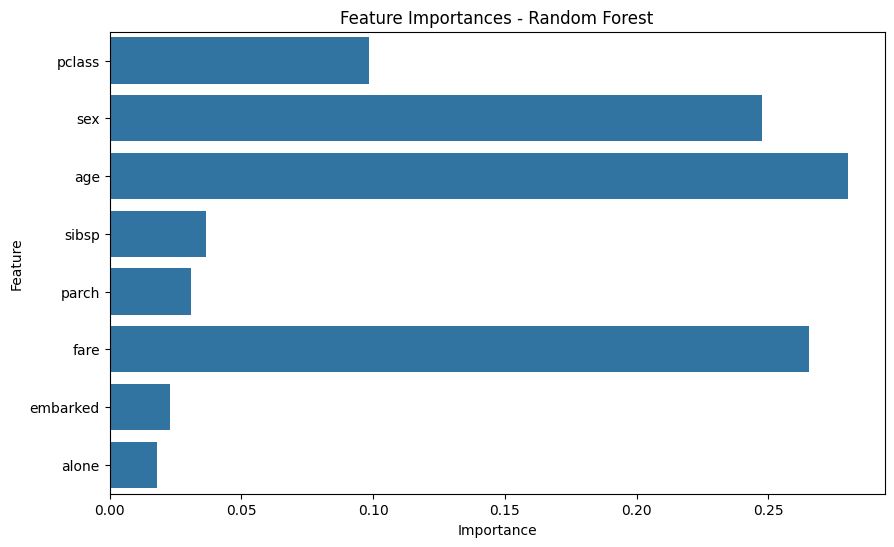

In [5]:
import matplotlib.pyplot as plt
# Feature importance from Random Forest
importances = rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [6]:
# Task 9: AdaBoost or Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier
import time

# Track training time (optional)
start = time.time()
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
end = time.time()
training_time = end - start
# Predict
ab_pred = ab.predict(X_test)
# Evaluate
ab_acc = accuracy_score(y_test, ab_pred)
ab_f1 = f1_score(y_test, ab_pred)
print("AdaBoost Results:")
print(f"Accuracy: {ab_acc:.4f}")
print(f"F1 Score: {ab_f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

AdaBoost Results:
Accuracy: 0.8322
F1 Score: 0.7931
Training Time: 0.23 seconds


In [7]:
from sklearn.metrics import f1_score

dt_f1 = f1_score(y_test, dt_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Model Comparison (F1 Score):")
print(f"Decision Tree: {dt_f1:.4f}")
print(f"Random Forest: {rf_f1:.4f}")
print(f"AdaBoost     : {ab_f1:.4f}")

Model Comparison (F1 Score):
Decision Tree: 0.6218
Random Forest: 0.7705
AdaBoost     : 0.7931


In [8]:
comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost'],
    'Accuracy': [dt_acc, rf_acc, ab_acc],
    'F1 Score': [dt_f1, rf_f1, ab_f1]
})

comparison

,Model,Accuracy,F1 Score
0,Decision Tree,0.685315,0.621849
1,Random Forest,0.804196,0.770492
2,AdaBoost,0.832168,0.793103
